# Исследование о продажах компьютерных игр

**Описание проекта**

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). В ходе проекта необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


**Цель исследования** — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке компьютерных игр.

Архив данных о продажах игр мы получили из файла /datasets/games.csv. О качестве данных ничего не известно. Поэтому перед изучением понадобится обзор данных.

**Ход исследования**

На этапе предобработки мы исправим ошибки в данных для дальнейшей корректной работы с ними.
После этого исследуем взаимосвязи и отобразим их на графиках.

Таким образом, исследование пройдёт в шесть этапов:

Обзор данных. \
Предобработка данных. \
Исследовательский анализ данных. \
Составление портрета пользователя для каждого региона. \
Проверка гипотез. \
Общий вывод.

**Описание данных** \
Name — название игры \
Platform — платформа \
Year_of_Release — год выпуска\
Genre — жанр игры\
NA_sales — продажи в Северной Америке (миллионы проданных копий)\
EU_sales — продажи в Европе (миллионы проданных копий)\
JP_sales — продажи в Японии (миллионы проданных копий)\
Other_sales — продажи в других странах (миллионы проданных копий)\
Critic_Score — оценка критиков (максимум 100)\
User_Score — оценка пользователей (максимум 10)\
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### ШАГ . Откроем файл с данными и изучим общую информацию

-Импортируем небходимые библиотеки и посмотрим на сами данные

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [30]:
try:
    data = pd.read_csv('C:/Users/User/Downloads')
except:
    data = pd.read_csv('/datasets/games.csv')

In [31]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [32]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [34]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [35]:
data.duplicated().sum()

0

**Вывод:** В файле 16715 строк и 11 столбцов. \
Дубликаты отсутствуют.

### ШАГ. Подготовим данные

-Приведем названия столбцов к нижнему регистру\
-Преобразуйте данные в нужные типы\
-Обработаем пропуски и опишем причины, которые могли привести к пропускам\
-Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [36]:
data.columns = data.columns.str.lower()

In [37]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Теперь названия столбцов соответствуют правилам

In [38]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [39]:
data['user_score'] = data['user_score'].str.replace('tbd','nan')
data['user_score'] = data['user_score'].astype(float)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [41]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [42]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,54.600000


В названии игры и жанре по 2 пропуска, в годе релиза 269, в оценке критиков,пользователей и рейтинге >6 тыс.

In [43]:
data = data.dropna(subset=['name']).reset_index(drop=True)
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

In [44]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [45]:
data['rating'] = data['rating'].replace('K-A','E')
data['rating'] = data['rating'].fillna('RP')

Категория 'RP'('Rating Pending') означает, что играм с данной категорией еще не присвоен окончательный рейтинг ESRB. Поэтому пропуски в рейтинге мы заменим на RP.


In [46]:
data['rating'].unique()

array(['E', 'RP', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

In [47]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [48]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


**Вывод:** В ходе предообработки данных: \
Названия столбцов были приведены к нижнему регистру \
Год релиза привели к целочисленному типу, т.к. изначально он идет с точкой.

В столбце "оценка пользователей" есть аббревиатура "tbd", что означает "to be decided" (будет решено). То есть рейтинг еще не определен. Заменять ее на какие-либо значения будет некорректно и может повлиять на данные, поэтому заменили на nan.
После этого привели данный столбец к вещественным числам.

Строки, в которых отсутствует название игры и год релиза, удалили, поскольку мы их не сможем использовать. \
В рейтинге заменили 'K-A' на 'Е', поскольку 'K-A' это устаревшая аббревиатура нынешней 'Е'. \
Пропущенные значения в рейтинге заполнили аббревиатурой 'WR', поскольку заполнение другими существующими исказит данные. \
Пропуски в оценке пользователей и критиков заполнять не стали также во избежании искажения данных. \
Возможными причинами возникновения пропусков могут быть отсутствие рейтингов у малоизвестных игр, а также сбой в системе при загрузке данных.

Также добавили новый столбец 'total_sales' с суммарными продажами игр во всех регионах.

### ШАГ. Проведем исследовательский анализ данных

-Динамика количества выпущенных игр за все время\
-Динамика продаж игр по платформам, а также выбор топ платформ\
-Определение актуального периода для построения прогноза на 2017 г.\
-Анализ платформ-лидеров по продажам\
-Анализ влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков\
-Общее распределение игр по жанрам, выявление самых прибыльных жанров

**Динамика количества выпущенных игр за все время**

In [49]:
release_games = data.pivot_table(index='year_of_release',values='name',aggfunc='count')
release_games

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Построим сводную таблицу по годам и количеству выпущенных игр

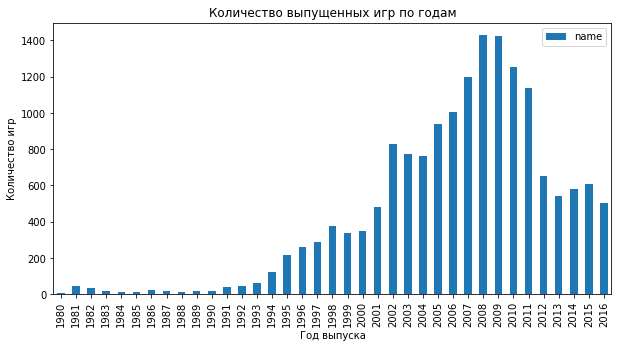

In [50]:
release_games.plot.bar(figsize=(10,5),title='Количество выпущенных игр по годам',xlabel='Год выпуска',ylabel='Количество игр');

Начало выпуска игр приходится на 1980 г. \
Видим, что пик приходится на 2008-2009 годы.
В 2008 и 2009 гг. было выпущено более 1400 игр, а 10 лет назад - более 300 игр. Разница в 4,5 раза, неплохой рост.\
После 2009 года количество идет на спад, возможно, это связано с тем, что началось развитие мобильных устройств и мобильных игр и часть компьютерной аудитории постепенно начала переходить в мобильные игры.

In [51]:
data = data.query('year_of_release > 1993')

Данные о выпущенных играх до 1993 года можно отсечь, поскольку в период с 1980 по 1993 г. выпуск был несущественный (до 100 игр в год) и их можно не учитывать.

In [52]:
data['year_of_release'].sort_values(ascending=False).unique()

<IntegerArray>
[2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004,
 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994]
Length: 23, dtype: Int64

**Динамика продаж игр по платформам, а также выбор топ платформ**

In [53]:
best_platforms = data.pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values('total_sales',ascending=False).reset_index()
best_platforms

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.76
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Построим сводную таблицу по платформам и суммарным продажам игр, затем выберем из них 6 платформ, лидирующих по продажам

In [54]:
six_platforms = best_platforms.head(6)['platform']
six_platforms

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
Name: platform, dtype: object

In [55]:
platf_year = data.query('platform in @six_platforms').pivot_table(
                       index='year_of_release', columns = 'platform', 
                       values = 'total_sales', aggfunc = 'sum')
platf_year

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN
2002,NaN,6.67,205.38,NaN,NaN,NaN


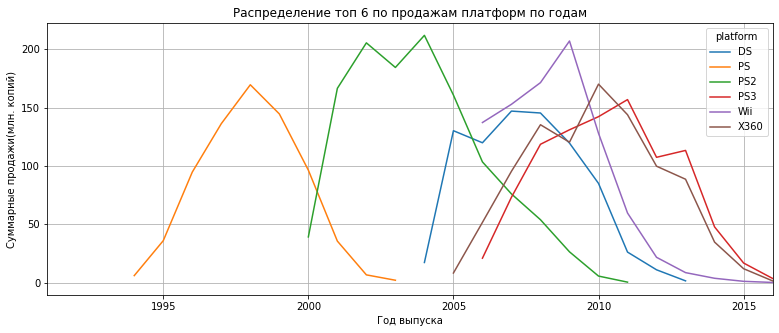

In [56]:
platf_year.plot(figsize=(13,5),grid=True,title='Распределение топ 6 по продажам платформ по годам',xlabel='Год выпуска',ylabel='Суммарные продажи(млн. копий)');
plt.xlim(1991,2016);

По графику можно наблюдать, что срок существования популярных платформ составляет около 8 лет.

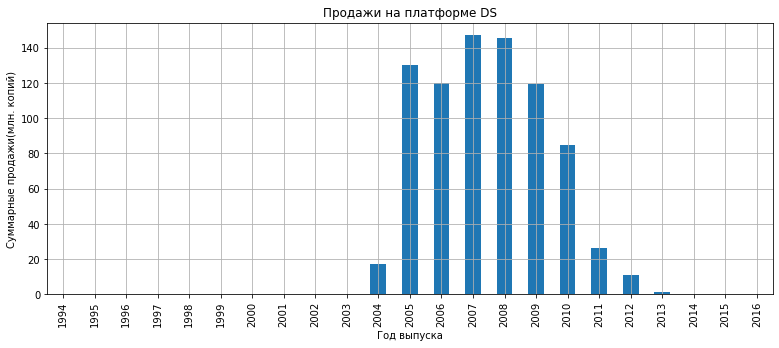

In [57]:
platf_year['DS'].plot.bar(figsize=(13,5),grid=True,title='Продажи на платформе DS',xlabel='Год выпуска',ylabel='Суммарные продажи(млн. копий)');

Пик продаж на платформе DS пришелся на 2007 год, затем начался спад. В 2011 году по сравнению с 2012 продажи были совсем низкими и затем только падали.

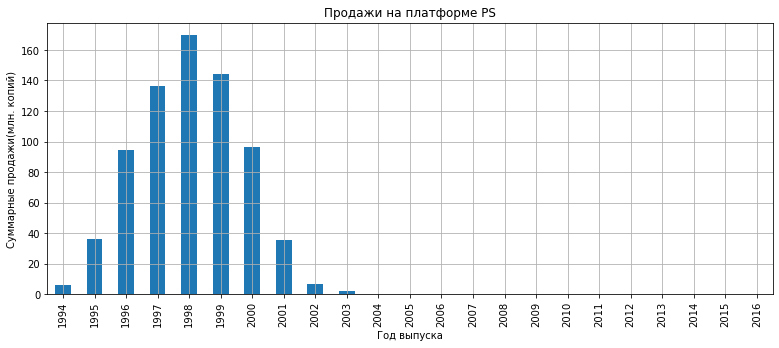

In [58]:
platf_year['PS'].plot.bar(figsize=(13,5),grid=True,title='Продажи на платформе PS',xlabel='Год выпуска',ylabel='Суммарные продажи(млн. копий)');

На платформе PS продажи росли постепенно, начиная с 1994 г. и достигли пика в 1998 г., затем снижались.

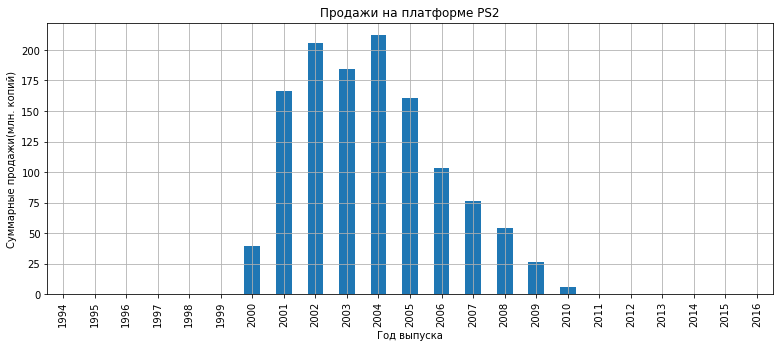

In [59]:
platf_year['PS2'].plot.bar(figsize=(13,5),grid=True,title='Продажи на платформе PS2',xlabel='Год выпуска',ylabel='Суммарные продажи(млн. копий)');

PS2 - абсолютный лидер продаж за все время. Пик пришелся на 2002-2005 г., затем постепенное снижение.

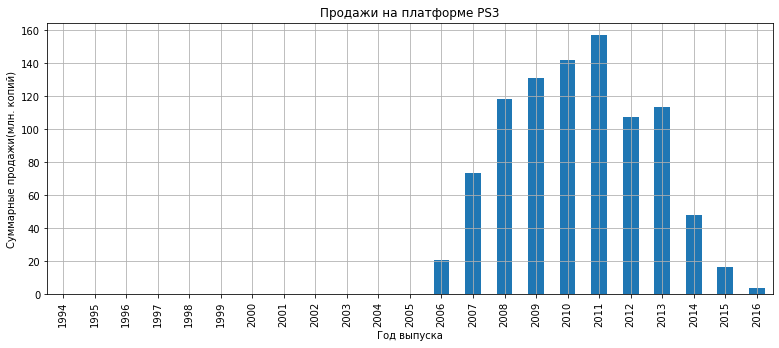

In [60]:
platf_year['PS3'].plot.bar(figsize=(13,5),grid=True,title='Продажи на платформе PS3',xlabel='Год выпуска',ylabel='Суммарные продажи(млн. копий)');

PS3 - одна из двух платформ из топ-6, у которой в 2016 г. были продажи игр. Пик пришелся на 2011 г., затем снижение. 

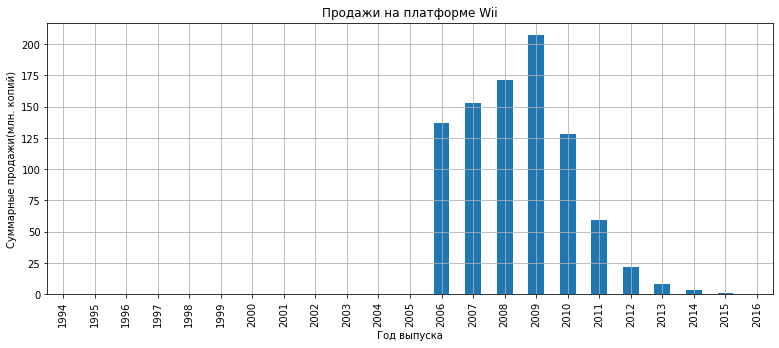

In [61]:
platf_year['Wii'].plot.bar(figsize=(13,5),grid=True,title='Продажи на платформе Wii',xlabel='Год выпуска',ylabel='Суммарные продажи(млн. копий)');

Платформа Wii начала свое существование в 2006 г. и сразу показала хорошие продажи, пик - в 2010 г.

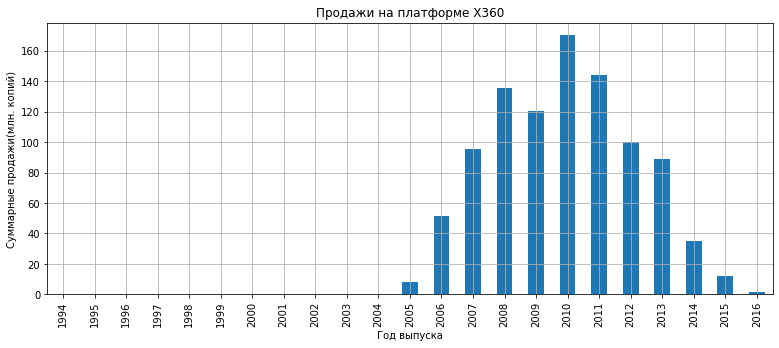

In [62]:
platf_year['X360'].plot.bar(figsize=(13,5),grid=True,title='Продажи на платформе X360',xlabel='Год выпуска',ylabel='Суммарные продажи(млн. копий)');

X360 просуществовала больше 10 лет, показывая неплохие продажи в 2008-2011 г.

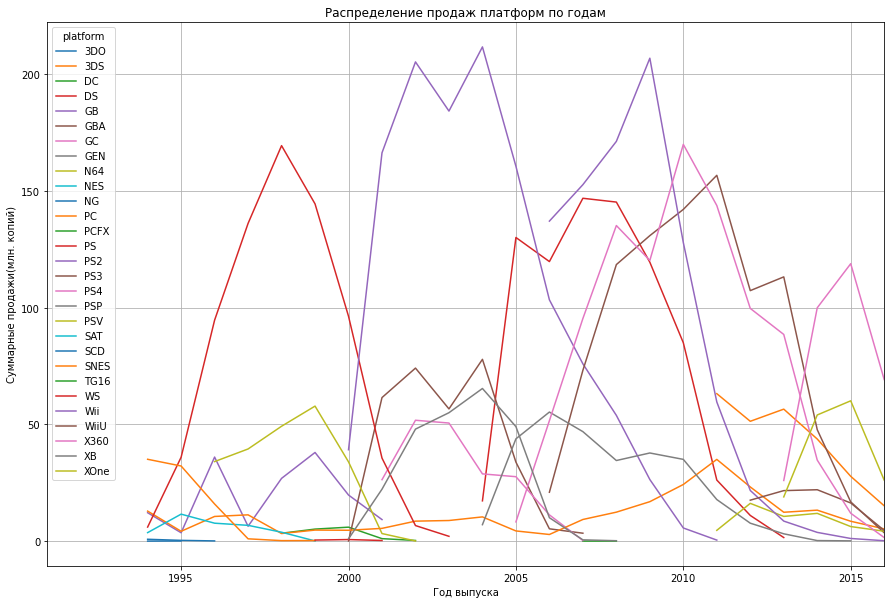

In [63]:
pla = data.pivot_table(
                       index='year_of_release', columns = 'platform', 
                       values = 'total_sales', aggfunc = 'sum')
pla.plot(figsize=(15,10),grid=True,title='Распределение продаж платформ по годам',xlabel='Год выпуска',ylabel='Суммарные продажи(млн. копий)');
plt.xlim(1991,2016);

Вывод: На графике показаны суммарные продажи всех платформ по годам релиза. \
Видно, что лидерами продаж были платформы PS2 и Wii, которые в свои лучшие времена преодолели планку в 200 млн. копий проданных игр (PS2 в 2002 и 2004, Wii в 2009).\
За все время у нескольких платформ пики продаж пришлись на период с 2006 по 2010 г., что также отображено на графике.\
Периодом с самыми низкими продажами являются года до 2000го и только платформа PS в этот период показала высокие продажи (больше 160 млн.).

**Определение актуального периода для построения прогноза на 2017 г.**

Для достоверности данных и построения прогноза, актуальным периодом будем считать с 2012 по 2016 гг.

In [64]:
act_data = data.query('year_of_release >= 2012')
act_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


**Анализ платформ-лидеров по продажам**

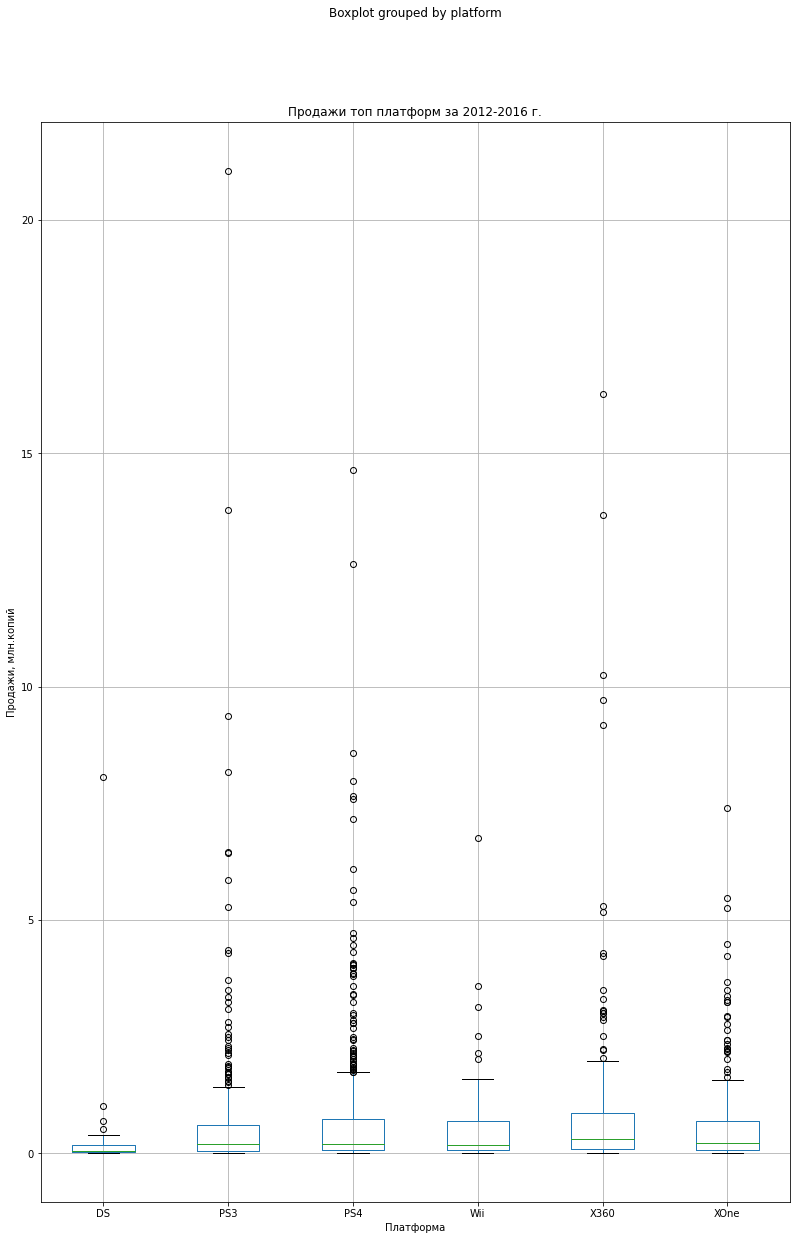

In [66]:
actplatf = ['PS2','X360','PS3','Wii','DS','PS','PS4','XOne']
act_data.query('platform in @actplatf').boxplot(
                column='total_sales', by='platform', figsize=(13, 20))
plt.title('Продажи топ платформ за 2012-2016 г.')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн.копий')
plt.show()

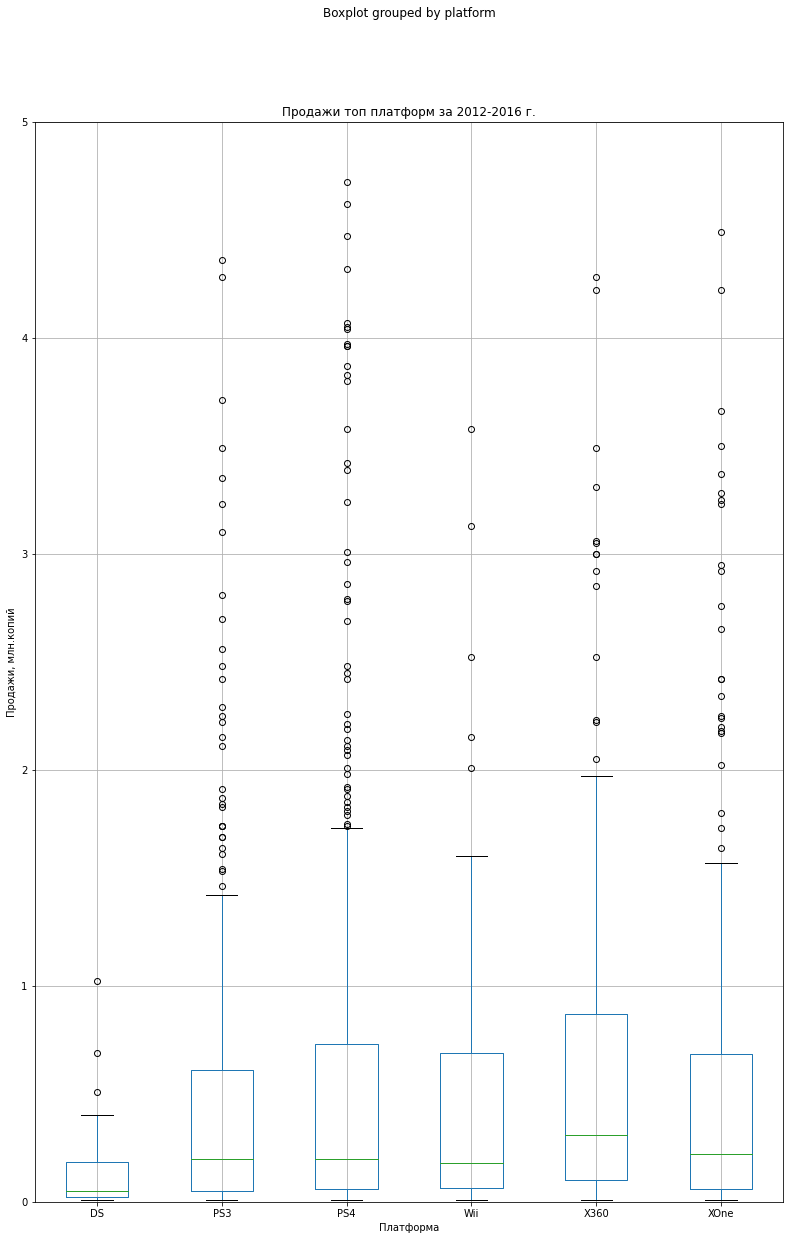

In [70]:
actplatf = ['PS2','X360','PS3','Wii','DS','PS','PS4','XOne']
act_data.query('platform in @actplatf').boxplot(
                column='total_sales', by='platform', figsize=(13, 20))
plt.title('Продажи топ платформ за 2012-2016 г.')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн.копий')
plt.ylim(0,5)
plt.show()

Построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам. \
Самая большая медиана у платформы X360, PS3 и PS4.

При этом платформы XOne, PS3 и PS4 менее стабильны в продажах и имеют наибольшее количество выбросов, т.е. показывают высокие продажи в большинстве своем за счет небольшого количества очень удачных игр.\
Платформы DS и Wii более стабильны в этом плане и содержат мало выбросов.

In [71]:
platfgg = act_data.query('platform in @six_platforms').pivot_table(
                       index='year_of_release', columns = 'platform', 
                       values = 'total_sales', aggfunc = 'sum')
display(platfgg)
platfgg.describe()

platform,DS,PS3,Wii,X360
year_of_release,,,,
2012,11.01,107.36,21.71,99.74
2013,1.54,113.25,8.59,88.58
2014,NaN,47.76,3.75,34.74
2015,NaN,16.82,1.14,11.96
2016,NaN,3.60,0.18,1.52


platform,DS,PS3,Wii,X360
count,2.000000,5.000000,5.000000,5.000000
mean,6.275000,57.758000,7.074000,47.308000
std,6.696301,50.617905,8.807657,44.599522
min,1.540000,3.600000,0.180000,1.520000
25%,3.907500,16.820000,1.140000,11.960000
50%,6.275000,47.760000,3.750000,34.740000
75%,8.642500,107.360000,8.590000,88.580000
max,11.010000,113.250000,21.710000,99.740000


**Анализ влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков**

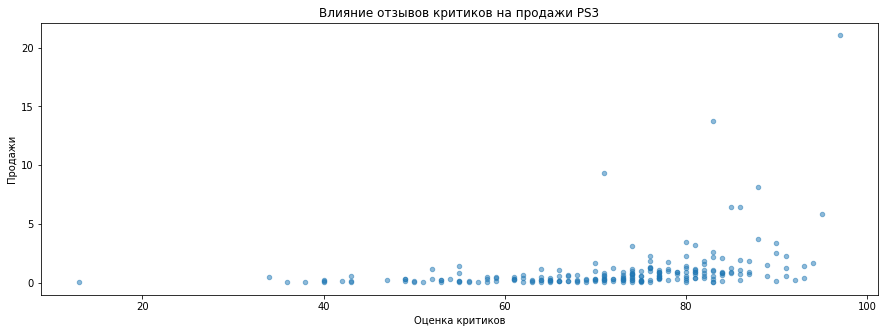

In [72]:
act_data.query('platform == "PS3"').plot.scatter(x='critic_score', y='total_sales', figsize=(15, 5), alpha=0.5)
plt.title('Влияние отзывов критиков на продажи PS3')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

На диаграмме рассеяния видно, что плотность продаж выше в областях графика с высокой оценкой критиков

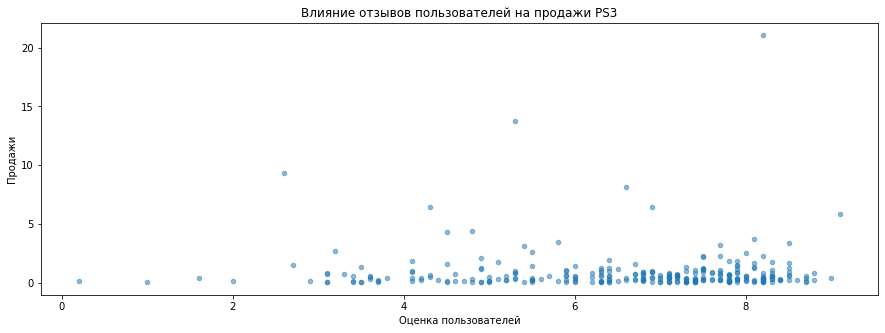

In [77]:
act_data.query('platform == "PS3"').plot.scatter(x='user_score', y='total_sales', figsize=(15, 5), alpha=0.5)
plt.title('Влияние отзывов пользователей на продажи PS3')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

Также как и с оценками критиков, на диаграмме видно, что чем выше оценка пользователей, тем больше продажи

In [74]:
act_data.query('platform == "PS3"')[['total_sales','critic_score','user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.331497,-0.005144
critic_score,0.331497,1.000000,0.539456
user_score,-0.005144,0.539456,1.000000


Посчитаем корреляцию между отзывами критиков, пользователей, продажами и самой популярной платформой - PS3.\
Корреляция между отзывами критиков и продажами составляет 0,4 ,что говорит о средней зависимости. То есть оценка критиков влияет на продажи платформы. \
Между отзывами пользователей и продажами корреляция отсутствует, соответственно связи нет: отзывы пользователей не влияют на продажи

**Также построим диаграмму рассеяния для других популярных платформ и посчитаем корреляцию**

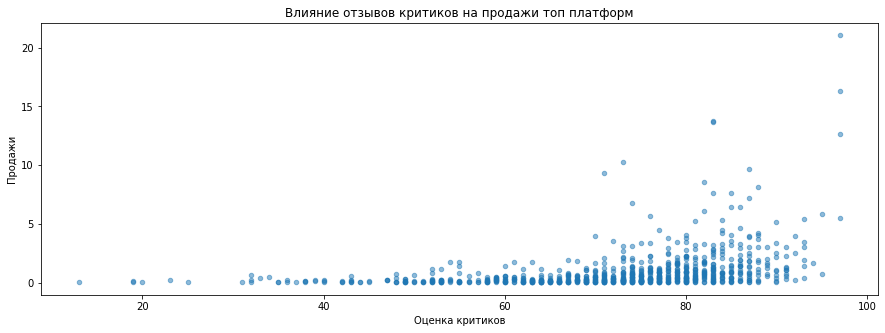

In [78]:
act_data.query('platform in @actplatf').plot.scatter(x='critic_score', y='total_sales', figsize=(15, 5), alpha=0.5)
plt.title('Влияние отзывов критиков на продажи топ платформ')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

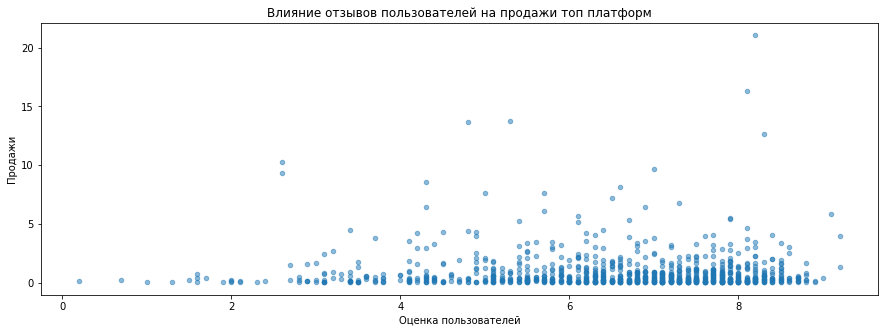

In [79]:
act_data.query('platform in @actplatf').plot.scatter(x='user_score', y='total_sales', figsize=(15, 5), alpha=0.5)
plt.title('Влияние отзывов пользователей на продажи топ платформ')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

In [80]:
act_data.query('platform in @actplatf')[['total_sales','critic_score','user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.356917,-0.009477
critic_score,0.356917,1.000000,0.533915
user_score,-0.009477,0.533915,1.000000


Вывод: Выше показана корреляция между оценками критиков, пользователей и суммарными продажами в популярных платформах.\
Видим, что корреляция практически не изменилась по сравнению с платформой PS3. Зависимость между продажами и оценками критиков выросла лишь на 0,02 , что не оказывает влияния. Зависимости между продажами и оценками пользователей по-прежнему нет. 

Среди популярных платформ на диаграмме рассеяния та же ситуация, что и по платформе PS3: чем выше оценка пользователей/критиков, тем выше продажи.

**Общее распределение игр по жанрам, выявление самых прибыльных жанров**

In [83]:
genres = act_data.pivot_table(index='genre',values = 'total_sales',aggfunc = 'sum').sort_values('total_sales',ascending=False)
genres

,total_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


Построим сводную таблицу по жанрам и суммарным продажам. \
Лучше всего продаются игры жанра экшен, шутер и спорт.

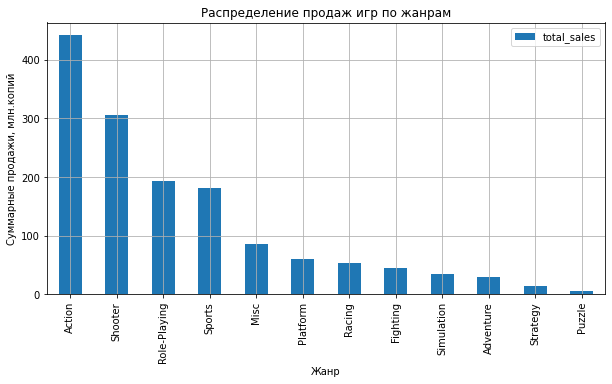

In [84]:
genres.plot.bar(figsize=(10,5),grid=True,title ='Распределение продаж игр по жанрам',xlabel = "Жанр",ylabel = "Суммарные продажи, млн.копий" );

Самый непопулярные жанры игры - приключения, стратегия и пазл. Их суммарные продажи в 6 раз меньше экшена.\
Однако для прибыльности нам нужны стабильные жанры, которые приносят доход не зависимо от платформы, значит на этот жанр есть устойчивый спрос. Поэтому построим диаграмму размаха, чтобы определить именно такие жанры и исключить нестабильные с большим количеством выбросов.

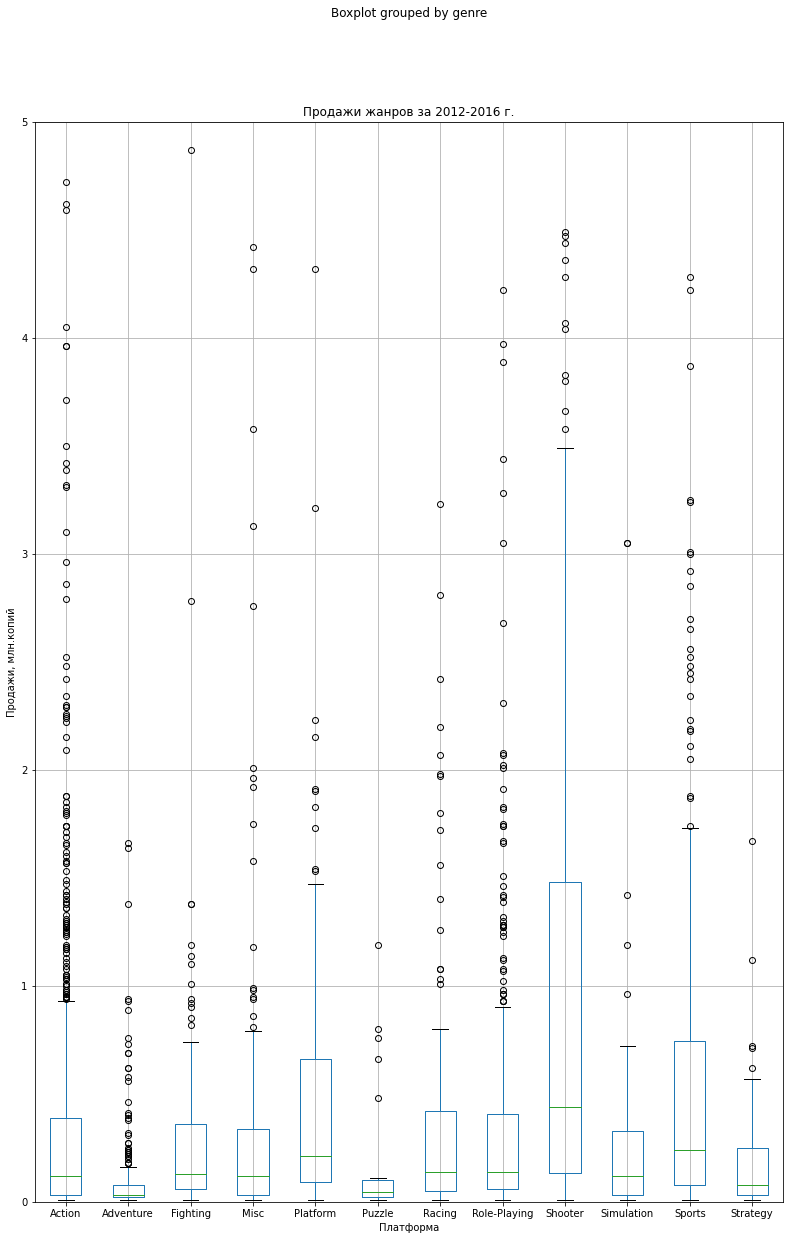

In [90]:
act_data.boxplot(
                column='total_sales', by='genre', figsize=(13, 20))
plt.title('Продажи жанров за 2012-2016 г.')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн.копий')
plt.ylim(0,5)
plt.show()

Самые продаваемые жанры Action и Role-Playing оказались совсем нестабильными с большим количеством выбросов. Туда же жанр Adventure. Их высокие показатели продаж держатся за счет некоторых успешных игр.\
Наиболее перспективными для составления прогноза являются игровые жанры Shooter (который также имеет самую высокую медиану), Sports и Platform, которые показывают более стабильные продажи.

**Вывод:** Анализ данных показал, что лидерами по продажам являются платформы PS2, X360, PS3, Wii, DS и PS. \
У платформы PS2 продажи игр за все время составили больше 1200 млн. проданных копий. \
Было решено использовать для дальнейшего анализа только данные с годами релиза 2012-2016. \
Рынок компьютерных игр начал свое развитие в 1980г. и достиг пика в 2008-2009 годах, затем пошел на спад. Помимо выше описанной причины в виде перехода на мобильные устройства, это может быть связано с перенасыщением рынка компьютерных игр. \
Наблюдается следующая зависимость: чем выше отзывы критиков/пользователей, тем выше продажи. Отзывы критиков оказывают бОльшее влияние на продажи. \
По продажам лидируют жанры Action, Shooter, Sports, а жанры Adventure, Strategy и Puzzle занимают последние места и мало продаются. Однако лидирующие жанры оказались нестабильными и не подходят для составления прогноза, так как содержат большое кол-во выбросов.
Лучше выбрать более стабильные по продажам жанры - Shooter, Sports и Platform.

### ШАГ.  Составление портрета пользователя каждого региона

-Самые популярные платформы (топ-5)\
-Самые популярные жанры (топ-5)\
-Влияние рейтинга ESRB на продажи

**Самые популярные платформы (топ-5)**

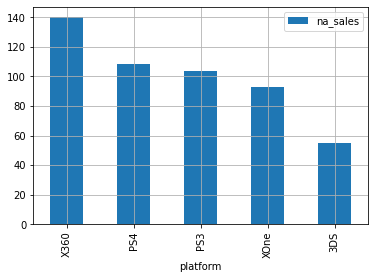

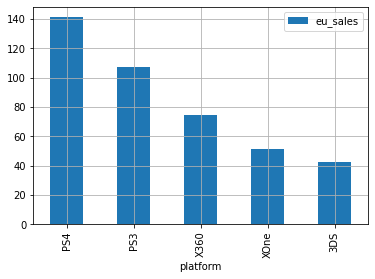

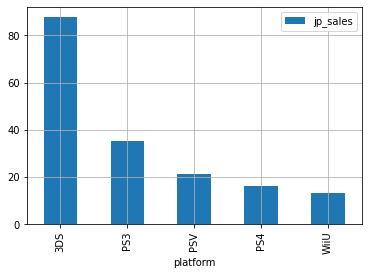

In [91]:
na_platf = act_data.pivot_table(index='platform', values = 'na_sales', aggfunc = 'sum').sort_values(by='na_sales', ascending=False).head(5).plot(grid=True,kind='bar')
eu_platf = act_data.pivot_table(index='platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', ascending=False).head(5).plot(grid=True,kind='bar')
jp_platf = act_data.pivot_table(index='platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', ascending=False).head(5).plot(grid=True,kind='bar')

В Северной Америке лидирует X360 (больше 300 млн. проданных копий), в Европе - PS3(больше 200 млн.), в Японии 3DS(больше 100 млн.) \
В целом наблюдается преобладание продаж на американском рынке. 

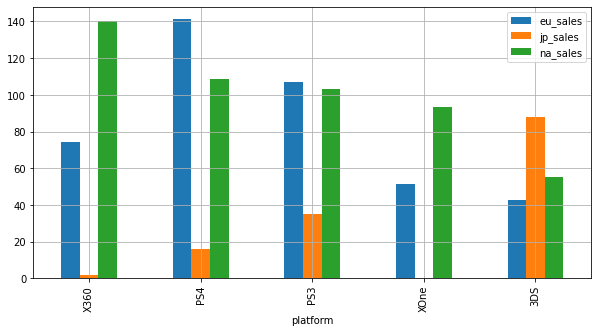

In [92]:
comm_platf = act_data.pivot_table(index='platform', values =['na_sales','eu_sales','jp_sales'], aggfunc = 'sum').sort_values(by='na_sales', ascending=False).head(5).plot(figsize=(10,5),grid=True,kind='bar')

**Самые популярные жанры (топ-5)**

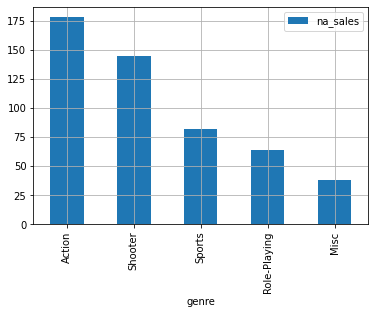

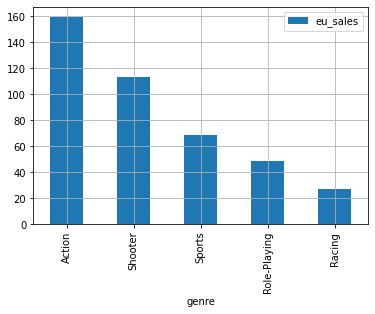

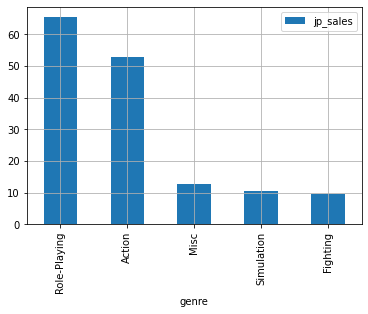

In [93]:
na_genre = act_data.pivot_table(index='genre', values = 'na_sales', aggfunc = 'sum').sort_values(by='na_sales', ascending=False).head(5).plot(grid=True,kind='bar')
eu_genre = act_data.pivot_table(index='genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', ascending=False).head(5).plot(grid=True,kind='bar')
jp_genre = act_data.pivot_table(index='genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', ascending=False).head(5).plot(grid=True,kind='bar')

Лидирующие жанры в Северной Америке и Европе практически идентичны: это Action, Shooter, Sports, Misc, Role-Playing (в порядке уменьшения продаж)\
В Японии же ситуация наоборот, первое место по продажам занимает жанр Role-Playing. Затем идут Action, Misc, Platform (этого жанра вообще нет в топе СА и Европы), Adventure.

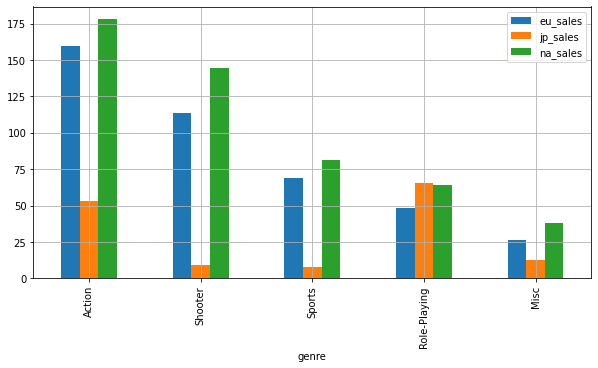

In [94]:
comm_genre = act_data.pivot_table(index='genre', values =['na_sales','eu_sales','jp_sales'], aggfunc = 'sum').sort_values(by='na_sales', ascending=False).head(5).plot(figsize=(10,5),grid=True,kind='bar')

**Влияние рейтинга ESRB на продажи**

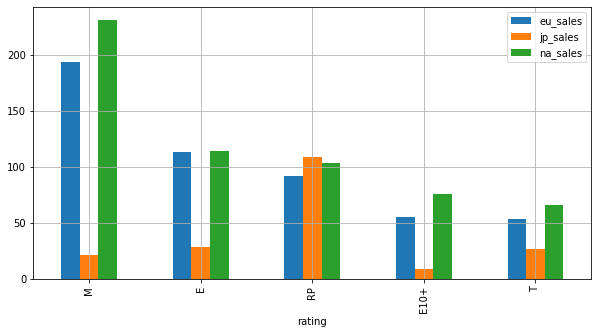

In [95]:
comm_rating = act_data.pivot_table(index='rating', values =['na_sales','eu_sales','jp_sales'], aggfunc = 'sum').sort_values(by='na_sales', ascending=False).head(5).plot(figsize=(10,5),grid=True,kind='bar')

Обозначение категорий: \
    M - для лиц старше 17 лет\
    E - для всех возрастов\
    RP - рейтинг ожидается\
    E10+ - для лиц старше 10 лет\
    T - для лиц старше 13 лет
    
Во всех регионах, кроме Японии, лучше всего продаются игры с рейтингом M, затем идут E, E10+ и T. Получается, что в Европе и СА наибольшим спросом пользуются игры со сценами насилия, похожим на реальную  жизнь, с использованием ненормативной лексики, употреблением табака/алкоголя. \
Однако в Европе немалую долю занимают игры с категорией RP.\
В Японии распределение другое. На первом месте находится категория RP, то есть игры без рейтинга. \
В этом и кроется главное различие в регионах, поскольку рейтинг ESRB предназначен для маркировки игр для США и Канады.

**Вывод:** \
Предпочтения Северной Америки и Европы похожи между собой. Японский рынок в свою очередь отличается.\
Топ-5 платформ в порядке уменьшения продаж:\
Северной Америки - X360, PS3, Wii, PS4, XOne\
Европы - PS3, X360, PS4, PC, Wii.
Японии - 3DS, PS3, PSP, DS, PSV. У них отдается предпочтение японским разработкам.

Топ-5 жанров в порядке уменьшения продаж:\
Северной Америки - Action, Shooter, Sports, Misc, Role-Playing\
Европы - Action, Shooter, Sports, Role-Playing, Misc. Различие с американским рынком только в последних двух местах. \
Японии- Role-Playing, Action, Misc, Platform, Adventure. Наибольшие продажи японскому рынку приносит жанр Role-Playing (который в СА и Европе занимает последние места).

Наиболее продаваемыми в Северной Америке и Европе являются игры с рейтингом M (для лиц старше 17 лет). Также Европе есть часть игр с категорией RP.\
В Японии же это - игры с категорией RP, то есть без рейтинга. \
Таким образом, японский рынок по всем пунктам отличается от американского и европейского. В Японии свой мир игр.

### ШАГ. Проверка гипотез

-Средние пользовательские рейтинги платформ Xbox One и PC одинаковые \
-Средние пользовательские рейтинги жанров Action и Sports разные

Поскольку выборки независимы, для проверки будем использовать t-критерий Стьюдента.\
Зададим уровень значимости alpha = 0.05

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

**Гипотезы**: \
    **Н0:** средние пользовательские рейтинги платформ Xbox One и PC равны\
**Н1:** средние пользовательские рейтинги платформ Xbox One и PC не равны

In [48]:
xone = act_data.query('platform == "XOne" and user_score > 0')['user_score']
pc = act_data.query('platform == "PC" and user_score > 0')['user_score']

In [49]:
alpha = 0.05
results = st.ttest_ind(xone,pc)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Различий между средними пользовательскими рейтингами платформ Xbox One и PC практически нет. Нулевая гипотеза не опровергнута.

**Средние пользовательские рейтинги жанров Action и Sports разные**

**Гипотезы**: \
    **Н0:** средние пользовательские рейтинги жанров Action и Sport равны\
**Н1:** средние пользовательские рейтинги жанров Action и Sport не равны

In [50]:
action = act_data.query('genre == "Action" and user_score > 0')['user_score']
sports = act_data.query('genre == "Sports" and user_score > 0')['user_score']

In [51]:
alpha = 0.05
results = st.ttest_ind(action,sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


Есть большие различия между выборками, что означает - средние пользовательские рейтинги отличаются. Нулевая гипотеза отвергнута.


**Вывод:** \
Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

Средние пользовательские рейтинги жанров Action и Sports различны.

### ШАГ. Общий вывод

Данные содержат информацию о продажах компьютерных игр за 1980-2016 годы.
В файле 16715 строк и 11 столбцов.

**В ходе предобработки данных:**

-наименования стоблцов приведены к нижнему регистру\
-преобразованы типы данных\
-удалены строки с пропусками данных в столбцах name, year_of_release\
-значения user_score, равные 'tbd' (To Be Decided) изменено на значение nan\
-пропуски в столбце rating заменены на категорию RP (рейтинг ожидается)\
-Пропуски значений столбца user_score и critic_score не были заполнены во избежании искажения данных\
-добавлен столбец total_sales с суммарными продажами игр во всех регионах.\

**В ходе исследовательского анализа данных было выявлено:**

-Лидерами по продажам являются платформы PS2, X360, PS3, Wii, DS и PS.\
-У платформы PS2 продажи игр за все время составили больше 1200 млн. проданных копий.\
-Было решено использовать для дальнейшего анализа только данные с годами релиза 2012-2016.\
-Рынок компьютерных игр начал свое развитие в 1980г. и достиг пика в 2008-2009 годах, затем пошел на спад. Помимо выше описанной причины в виде перехода на мобильные устройства, это может быть связано с перенасыщением рынка компьютерных игр.
-Наблюдается следующая зависимость: чем выше отзывы критиков/пользователей, тем выше продажи. Отзывы критиков оказывают бОльшее влияние на продажи.\
-По продажам лидируют жанры Action, Shooter, Sports, а жанры Adventure, Strategy и Puzzle занимают последние места и мало продаются. Однако лидирующие жанры оказались нестабильными и не подходят для составления прогноза, так как содержат большое кол-во выбросов. Лучше выбрать более стабильные по продажам жанры - Shooter, Sports и Platform.

**Предпочтения Северной Америки и Европы очень схожи. Японский рынок в свою очередь отличается.** \
Топ-5 платформ:\
Северной Америки и Европы - X360, PS3, Wii, PS4, XOne\
Японии - 3DS, PS3, PSP, DS, PSV. У них отдается предпочтение японским разработкам.

Топ-5 жанров:\
Северной Америки и Европы - Action, Shooter, Sports, Misc, Role-Playing\
Японии - Role-Playing, Action, Misc, Platform, Adventure. Наибольшие продажи японскому рынку приносит жанр Role-Playing (который в СА и Европе занимает последние места).

Наиболее продаваемыми в Северной Америке и Европе являются игры с рейтингом M (для лиц старше 17 лет). Также Европе есть часть игр с категорией RP. \
В Японии же это - игры с категорией RP, то есть без рейтинга.\
Дело в том, что рейтинг ESRB предназачен для маркировки игр для США и Канады, поэтому у Японии другие показатели.

**При прогнозе стоит обратить внимание на следующие зависимости:**

Продажи зависят от оценок пользователей и оценок критиков: чем выше оценки, тем выше продажи. Особенно это прослеживается с оценками критиков.\
Наиболее популярными являются жанры Action, Shooter, Sports и Role-Playing(для Японии), которые показывают самые высокие продажи за весь исследуемый период.

Были проведены статистические t-тесты для проверки гипотез по сравнению пользовательских рейтингов платформ Xbox One и PC и  жанров Action и Sports. \
Таким образом,

**Средние пользовательские рейтинги платформ Xbox One и PC почти одинаковы.\
Средние пользовательские рейтинги жанров Action и Sports отличаются.**